In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import lil_matrix 
import scipy.spatial.distance 
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('finalDf.csv')

In [4]:
df

,Year,Month,State,City,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
0,2006,January,MD,Adelphi,0.666667,23.333333,58.380462,6.651906,0.008978
1,2006,February,MD,Adelphi,0.523810,16.000000,64.210977,12.375184,0.011565
2,2006,March,MD,Adelphi,0.619048,12.809524,71.779725,18.881910,0.010393
3,2006,April,MD,Adelphi,0.428571,2.619048,81.003826,29.565725,0.019990
4,2006,May,MD,Adelphi,0.380952,0.095238,88.391318,39.327334,0.044866
...,...,...,...,...,...,...,...,...,...
811,2022,August,MS,Ackerman,0.428571,0.000000,99.340256,65.717980,0.037335
812,2022,September,MS,Ackerman,0.809524,0.000000,96.063745,50.827322,0.030998
813,2022,October,MS,Ackerman,1.238095,0.190476,88.225997,36.404745,0.007327
814,2022,November,MS,Ackerman,0.761905,3.142857,79.125849,25.516478,0.020426


In [5]:
simDf=df[['Year', 'City', 'AVG_Dry_Spell', 'AVG_Frost_Days','AVG_Max_High_Temp','AVG_Min_Low_Temp','AVG_Precip_Percentile']]

In [6]:
simDf

,Year,City,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
0,2006,Adelphi,0.666667,23.333333,58.380462,6.651906,0.008978
1,2006,Adelphi,0.523810,16.000000,64.210977,12.375184,0.011565
2,2006,Adelphi,0.619048,12.809524,71.779725,18.881910,0.010393
3,2006,Adelphi,0.428571,2.619048,81.003826,29.565725,0.019990
4,2006,Adelphi,0.380952,0.095238,88.391318,39.327334,0.044866
...,...,...,...,...,...,...,...
811,2022,Ackerman,0.428571,0.000000,99.340256,65.717980,0.037335
812,2022,Ackerman,0.809524,0.000000,96.063745,50.827322,0.030998
813,2022,Ackerman,1.238095,0.190476,88.225997,36.404745,0.007327
814,2022,Ackerman,0.761905,3.142857,79.125849,25.516478,0.020426


In [7]:
simDf

,Year,City,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
0,2006,Adelphi,0.666667,23.333333,58.380462,6.651906,0.008978
1,2006,Adelphi,0.523810,16.000000,64.210977,12.375184,0.011565
2,2006,Adelphi,0.619048,12.809524,71.779725,18.881910,0.010393
3,2006,Adelphi,0.428571,2.619048,81.003826,29.565725,0.019990
4,2006,Adelphi,0.380952,0.095238,88.391318,39.327334,0.044866
...,...,...,...,...,...,...,...
811,2022,Ackerman,0.428571,0.000000,99.340256,65.717980,0.037335
812,2022,Ackerman,0.809524,0.000000,96.063745,50.827322,0.030998
813,2022,Ackerman,1.238095,0.190476,88.225997,36.404745,0.007327
814,2022,Ackerman,0.761905,3.142857,79.125849,25.516478,0.020426


In [8]:
simDf=simDf.groupby(['City', 'Year']).mean()

In [9]:
simDf

AVG_Dry_Spell  AVG_Frost_Days  AVG_Max_High_Temp   
City     Year                                                     
Ackerman 2006       0.634921        3.734127          84.651995  \
         2007       0.742063        3.559524          85.132411   
         2008       0.603175        3.230159          85.240573   
         2009       0.619048        3.702381          84.179237   
         2010       0.650794        3.710317          85.221455   
...                      ...             ...                ...   
Albany   2018       1.158730        0.047619          76.537317   
         2019       1.111111        0.047619          76.134391   
         2020       1.166667        0.055556          76.417516   
         2021       1.162698        0.095238          75.990865   
         2022       1.099206        0.075397          76.307524   

               AVG_Min_Low_Temp  AVG_Precip_Percentile  
City     Year                                           
Ackerman 2006         38.151889               0.029529  
         2007         38.447782               0.029502  
         2008         38.881927               0.030435  
         2009         37.850245               0.031214  
         2010         38.388948               0.032159  
...                         ...                    ...  
Albany   2018         45.418773               0.013766  
         2019         45.129476               0.013624  
         2020         45.142328               0.012360  
         2021         45.007205               0.010462  
         2022         45.238274               0.014852  

[68 rows x 5 columns]

In [10]:
simDf=simDf.reset_index()

In [11]:
simDf

,City,Year,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
0,Ackerman,2006,0.634921,3.734127,84.651995,38.151889,0.029529
1,Ackerman,2007,0.742063,3.559524,85.132411,38.447782,0.029502
2,Ackerman,2008,0.603175,3.230159,85.240573,38.881927,0.030435
3,Ackerman,2009,0.619048,3.702381,84.179237,37.850245,0.031214
4,Ackerman,2010,0.650794,3.710317,85.221455,38.388948,0.032159
...,...,...,...,...,...,...,...
63,Albany,2018,1.158730,0.047619,76.537317,45.418773,0.013766
64,Albany,2019,1.111111,0.047619,76.134391,45.129476,0.013624
65,Albany,2020,1.166667,0.055556,76.417516,45.142328,0.012360
66,Albany,2021,1.162698,0.095238,75.990865,45.007205,0.010462


In [12]:
years = simDf["Year"].unique()
similarities = {}
for year in years:
    simDf_year = simDf.loc[simDf['Year'] == year]
    simDf_year.reset_index(drop=True, inplace=True)
    simDf_year_indexed = simDf_year.set_index('City')
    target_city_stats = simDf_year_indexed.loc['Adelphi']
    distances = scipy.spatial.distance.cdist(simDf_year_indexed, [target_city_stats], metric="euclidean")[:,0]
    query_distances = list(zip(simDf_year.index, distances))
    
    similar_cities = {}
    for similar_city, similar_stats in sorted(query_distances, key=lambda x: x[1], reverse=False)[:4]:
        similar_city_name = simDf_year.iloc[similar_city]["City"]
        similar_cities[similar_city_name] = similar_stats
    
    similarities[year] = similar_cities

similarAdelphi = pd.DataFrame.from_dict(similarities, orient='index')

In [13]:
similarAdelphi.drop(columns='Adelphi', inplace=True)

In [14]:
similarAdelphi

,Ackerman,Albany,Alachua
2006,7.951666,14.619012,19.633004
2007,8.054976,14.196127,19.805840
2008,8.397810,13.698406,19.798467
2009,7.406389,14.895165,19.849869
2010,7.320594,13.906161,19.062454
2011,7.417390,14.400133,19.224976
2012,7.892653,13.532037,19.331983
2013,7.827657,14.075867,19.841635
2014,7.308861,14.163740,18.662285
2015,7.773444,14.242596,19.649246


In [15]:
average_similarity=similarAdelphi.mean(axis=0)

In [16]:
average_similarity

Ackerman     7.755463
Albany      14.212823
Alachua     19.370643
dtype: float64

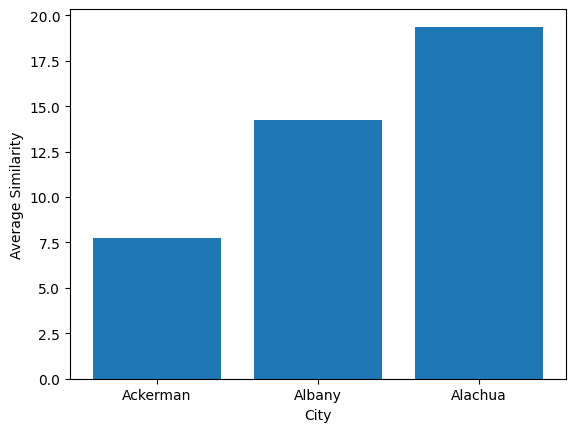

In [17]:
plt.bar(average_similarity.index, average_similarity.values)
plt.xlabel('City')
plt.ylabel('Average Similarity')
plt.show()

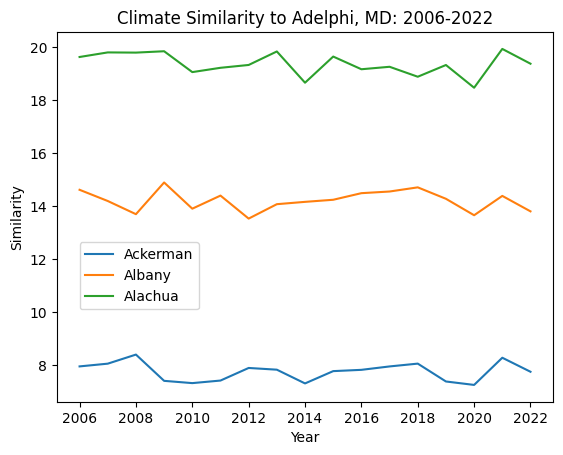

In [31]:
similarAdelphi.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Similarity')
plt.title('Climate Similarity to Adelphi, MD: 2006-2022')
plt.legend(bbox_to_anchor=(.3,.45))
plt.show()

In [19]:
simDf_2006=simDf.loc[simDf['Year'] == 2006]
simDf_2006.reset_index(drop=True, inplace=True)

In [20]:
display(simDf_2006)

,City,Year,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile
0,Ackerman,2006,0.634921,3.734127,84.651995,38.151889,0.029529
1,Adelphi,2006,0.448413,6.809524,80.139662,32.374782,0.023707
2,Alachua,2006,0.626984,0.420635,89.938721,48.141304,0.041041
3,Albany,2006,1.162698,0.107143,75.805234,44.601637,0.011395
